#                                NIFTY_50 PREDICTION MODEL

### ---- Importing important libraries

In [1]:
import pandas as pd
import requests
from  bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

### --- Get list of companies in Nifty 50

In [2]:
url_50="https://tradingfuel.com/nifty-50-stock-list-2022/"

In [3]:
r=requests.get(url_50)

In [4]:
soup=BeautifulSoup(r.text,"html.parser")

In [5]:
data=soup.find(class_="wp-block-table").getText(":").split(":")

In [6]:
nifty_50=data[7::5]

In [7]:
nifty_50=nifty_50[:50]

### --- Get Historical Data

In [8]:
df={}

In [9]:
for i in nifty_50:
    i=i.replace(" ","")
    data_url="https://query1.finance.yahoo.com/v7/finance/download/"+i+".NS?period1=1541289600&period2=1667520000&interval=1d&events=history&includeAdjustedClose=true"
    
    df[i]=pd.read_csv(data_url)
    
    

### --- Data Preprocessing and EDA

In [10]:
df['SBIN'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       988 non-null    object 
 1   Open       988 non-null    float64
 2   High       988 non-null    float64
 3   Low        988 non-null    float64
 4   Close      988 non-null    float64
 5   Adj Close  988 non-null    float64
 6   Volume     988 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.2+ KB


In [11]:
for i in nifty_50:
    i=i.replace(" ","")
    df[i]["Date"]=pd.to_datetime(df[i]["Date"])

In [12]:
df['SBIN'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       988 non-null    datetime64[ns]
 1   Open       988 non-null    float64       
 2   High       988 non-null    float64       
 3   Low        988 non-null    float64       
 4   Close      988 non-null    float64       
 5   Adj Close  988 non-null    float64       
 6   Volume     988 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 54.2 KB


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


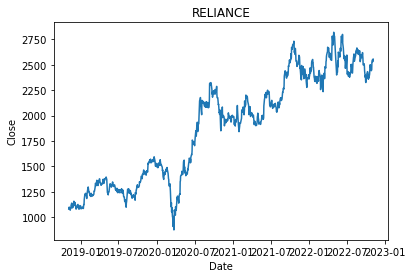

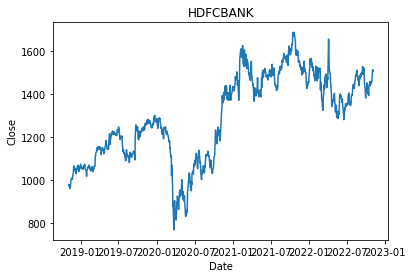

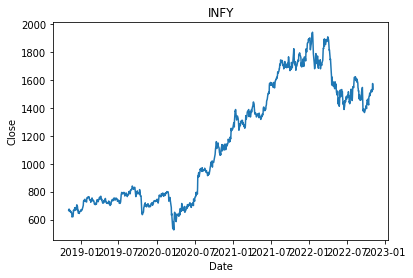

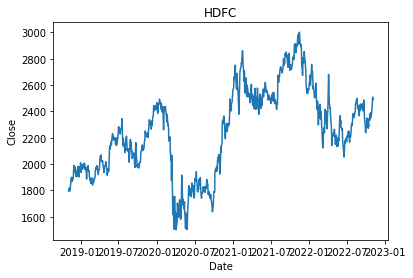

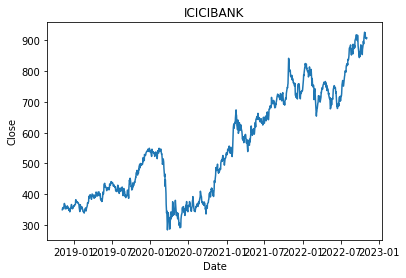

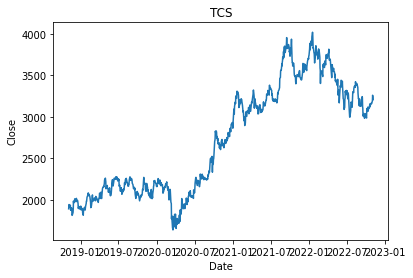

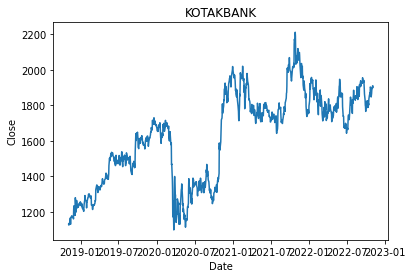

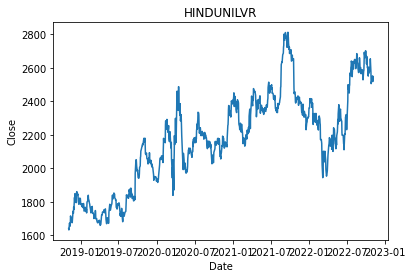

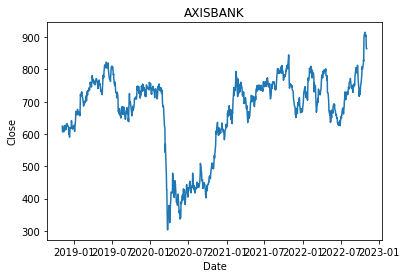

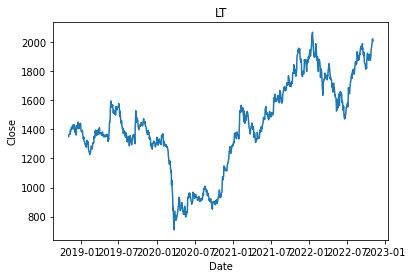

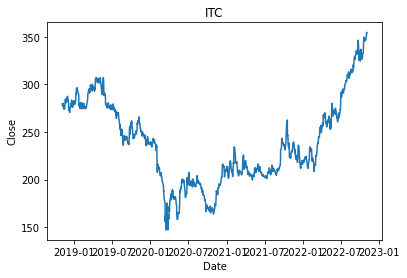

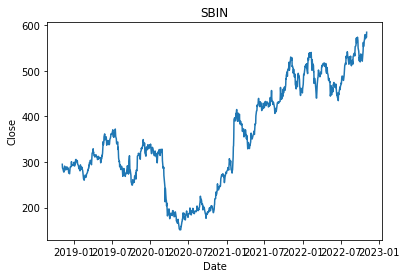

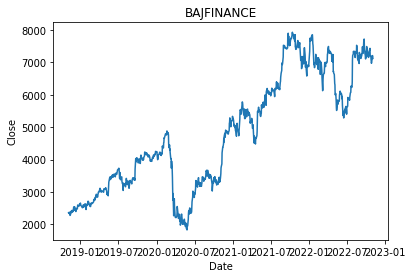

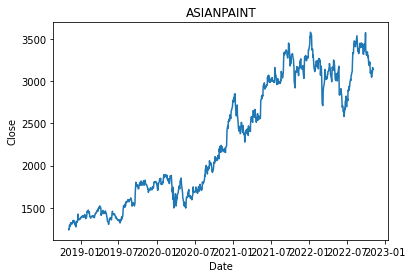

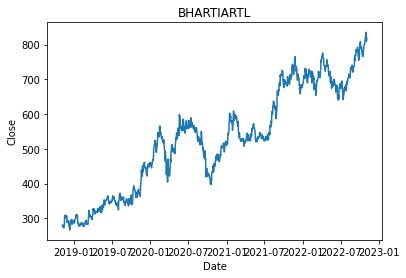

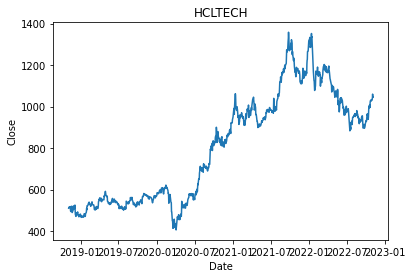

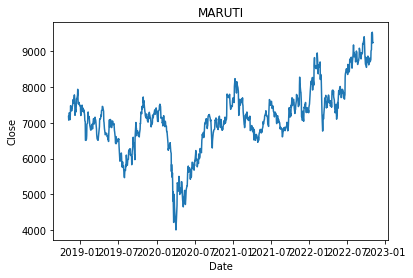

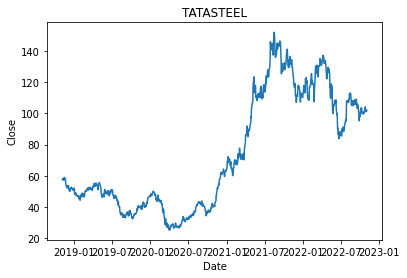

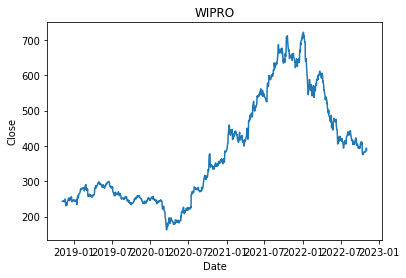

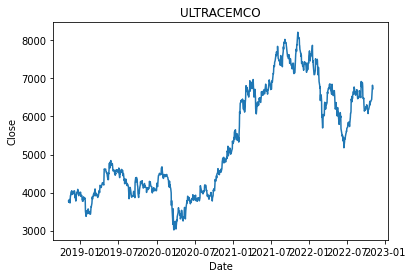

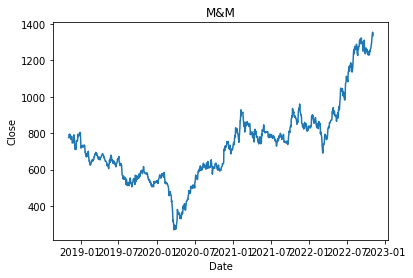

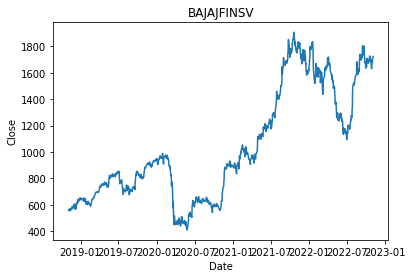

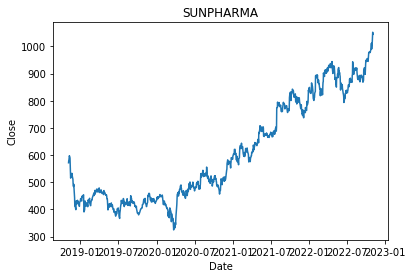

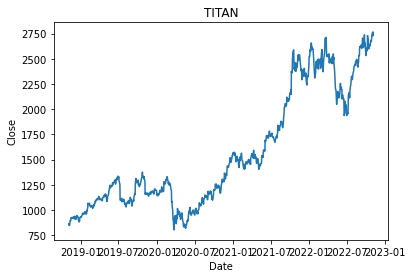

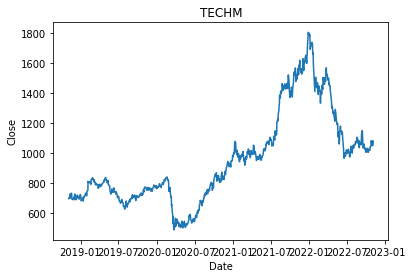

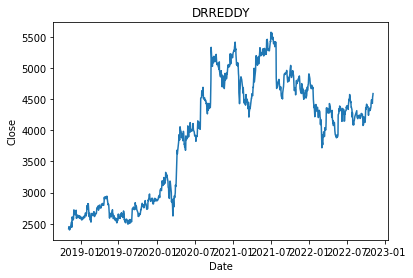

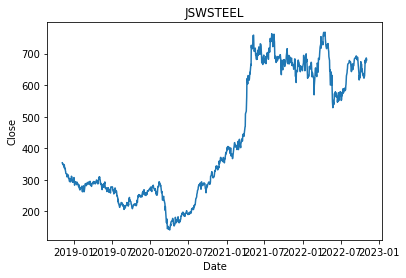

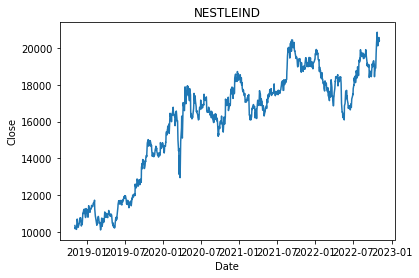

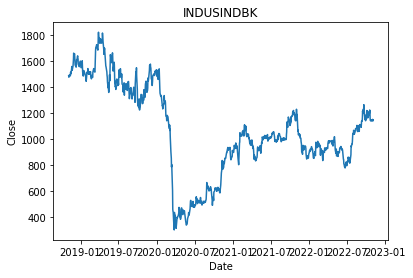

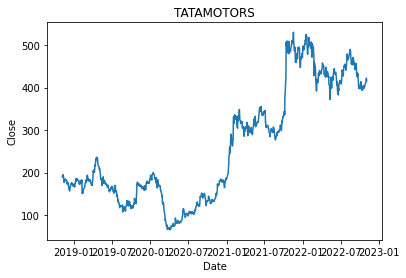

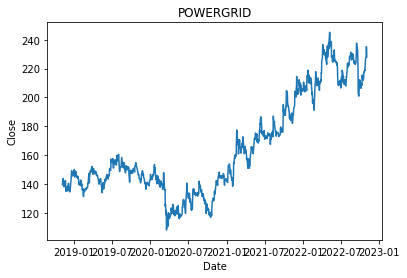

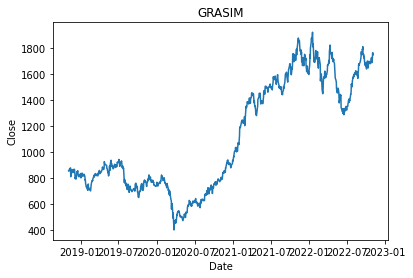

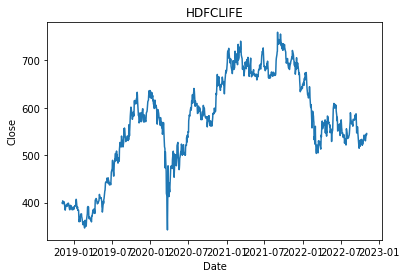

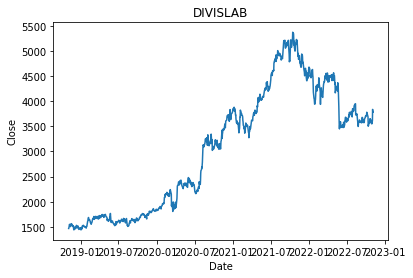

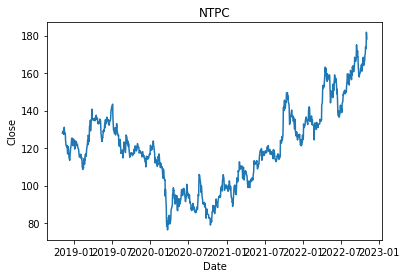

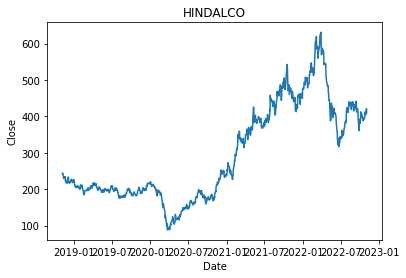

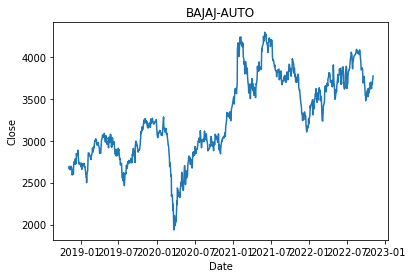

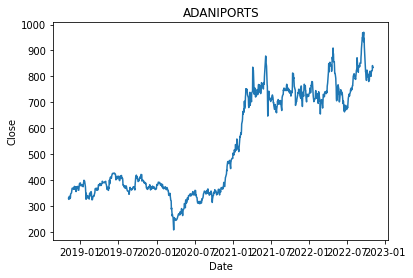

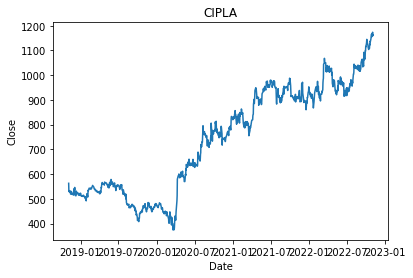

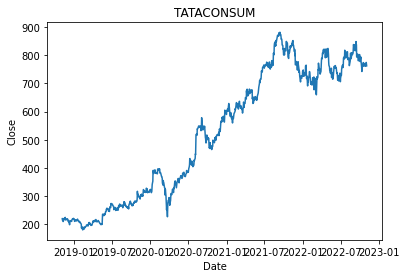

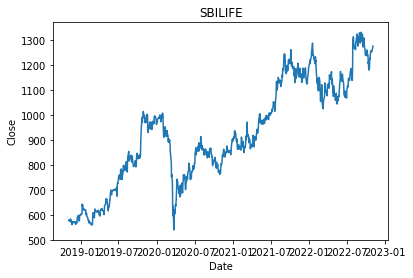

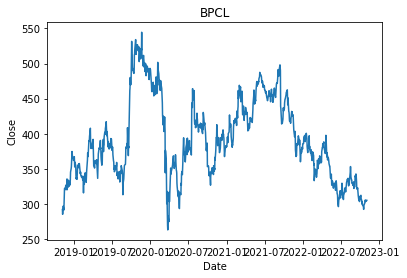

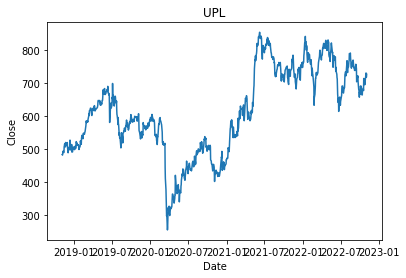

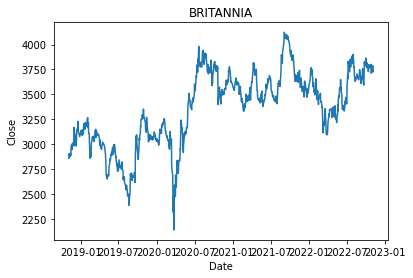

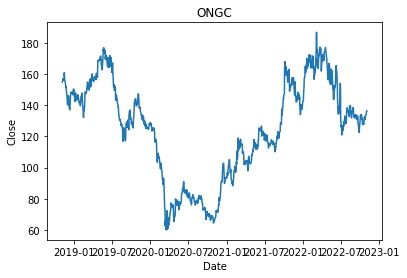

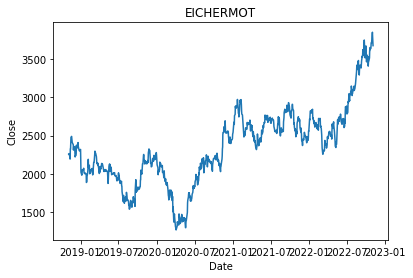

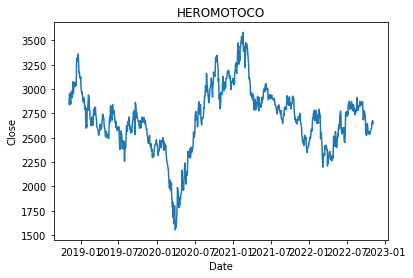

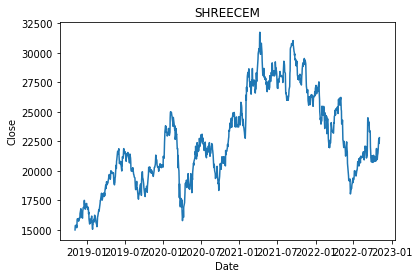

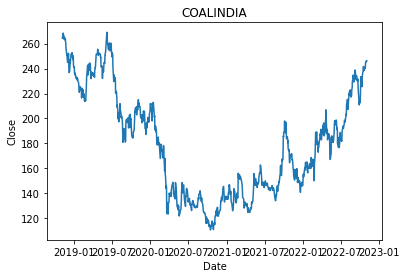

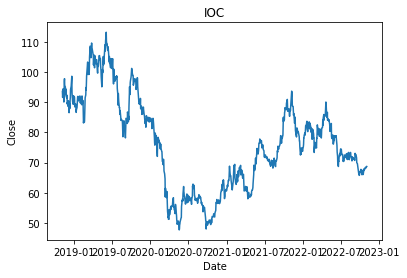

<Figure size 432x288 with 0 Axes>

In [13]:
for i in nifty_50:
    i=i.replace(" ","")
    sns.lineplot(x=df[i]["Date"],y=df[i]["Close"])
    plt.title(i)
    plt.figure()

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


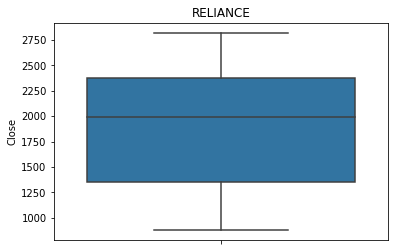

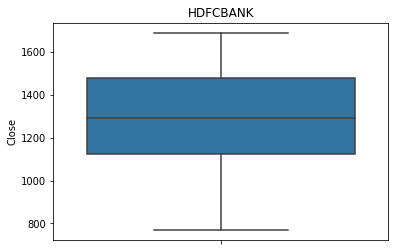

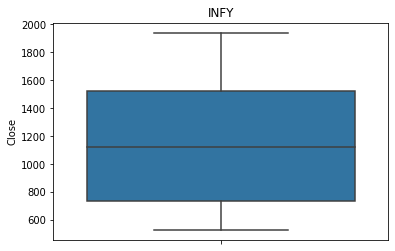

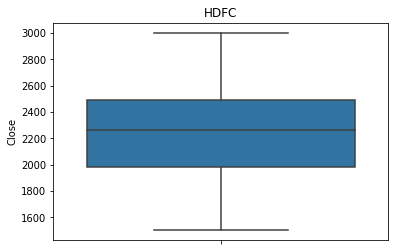

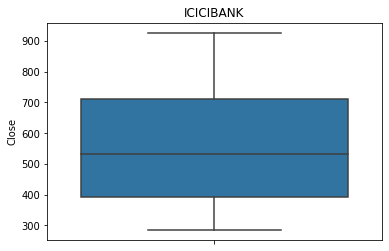

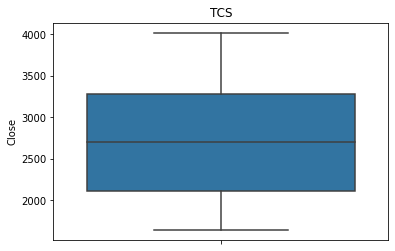

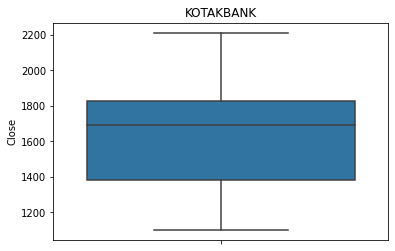

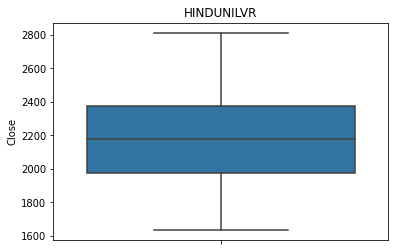

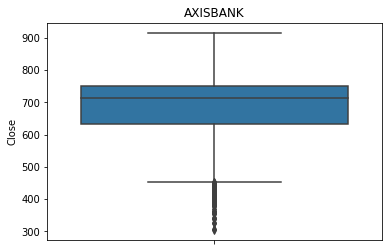

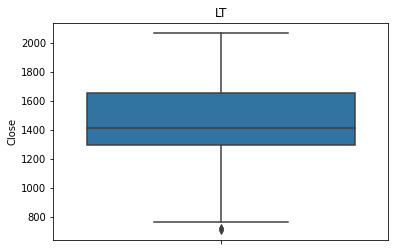

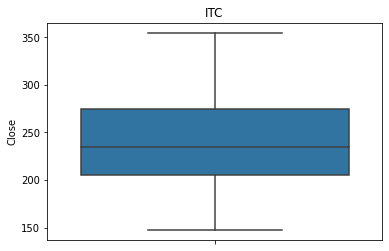

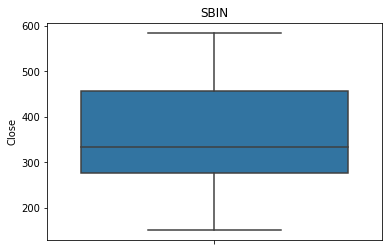

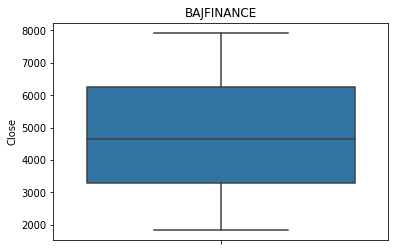

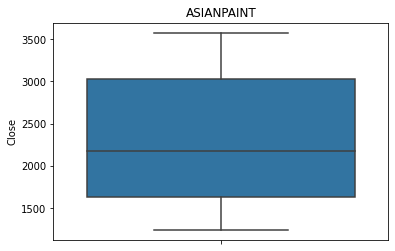

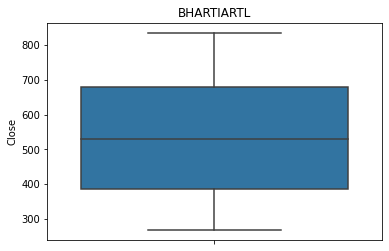

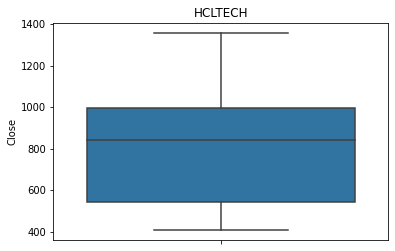

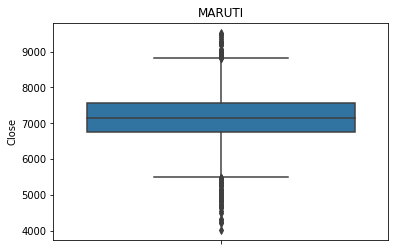

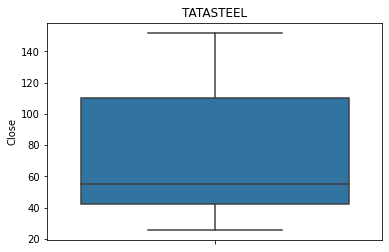

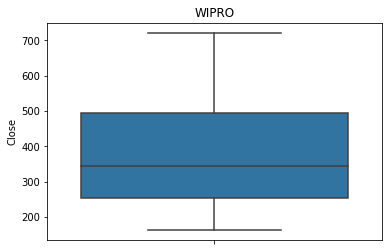

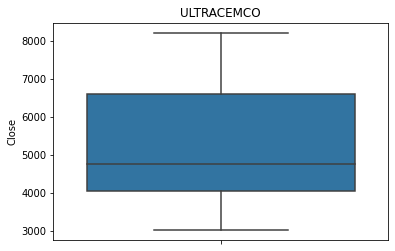

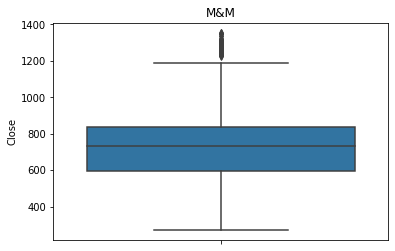

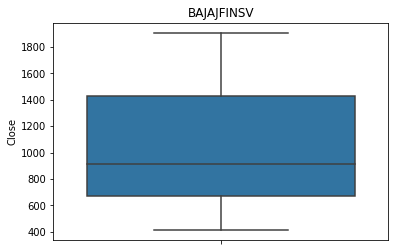

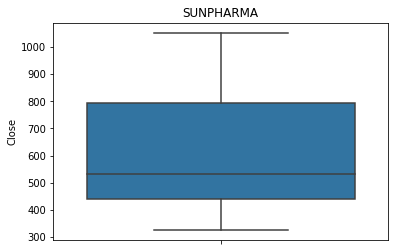

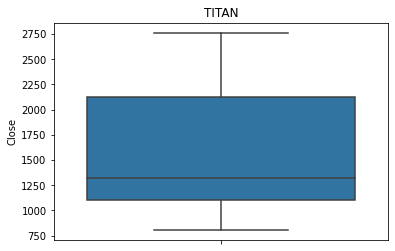

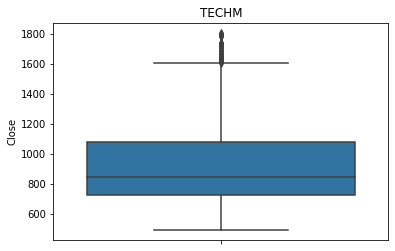

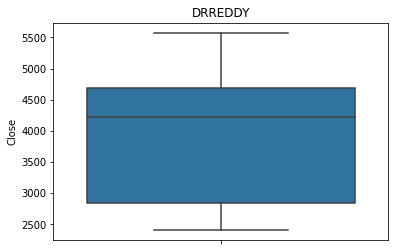

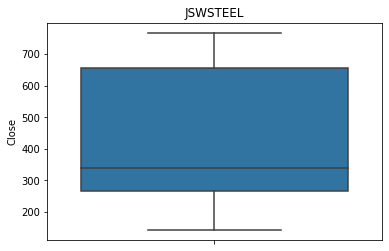

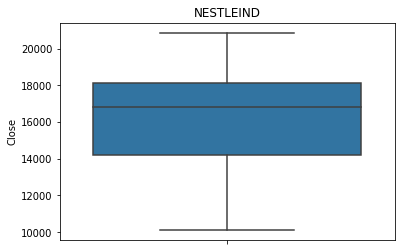

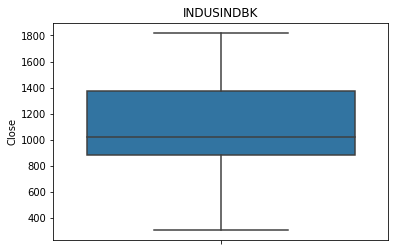

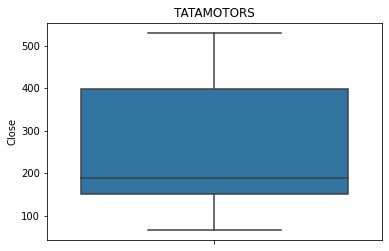

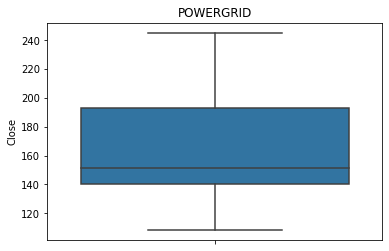

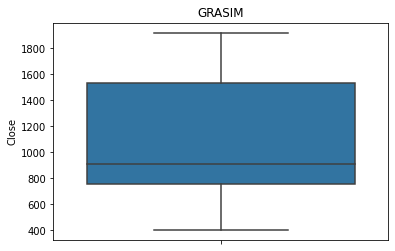

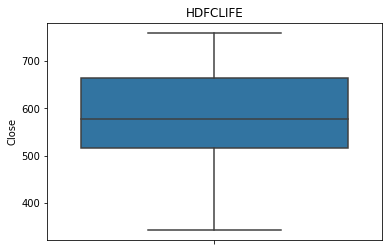

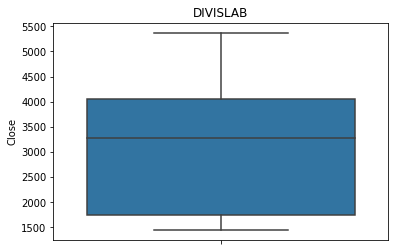

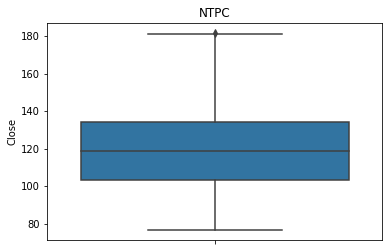

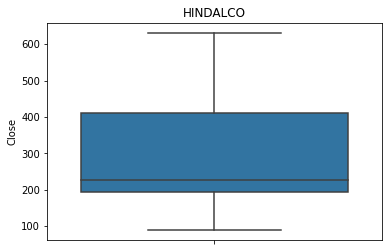

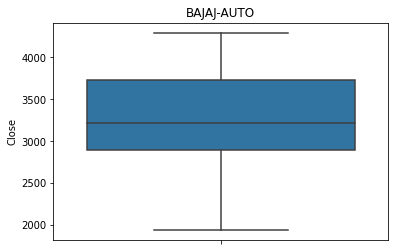

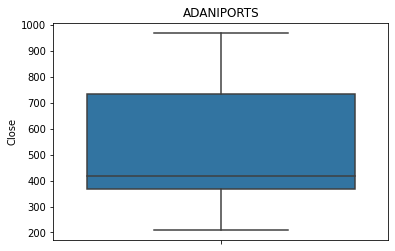

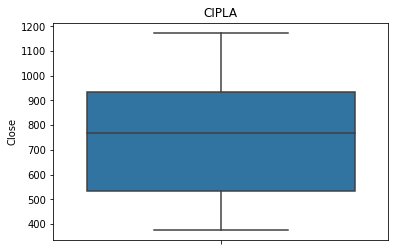

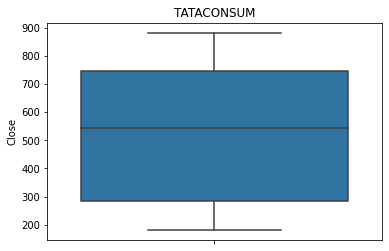

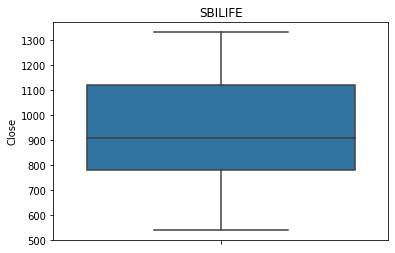

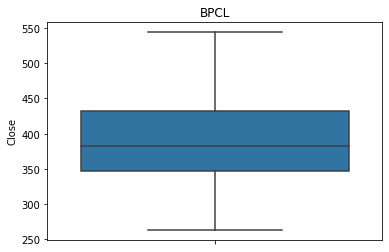

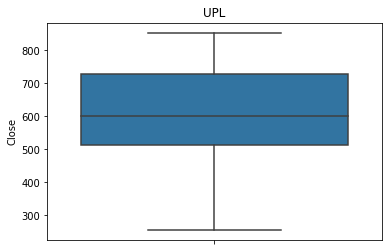

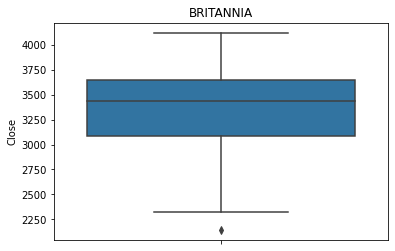

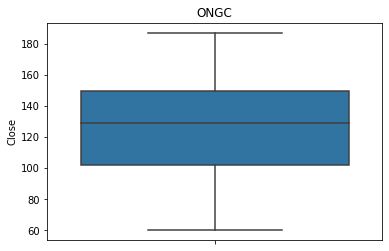

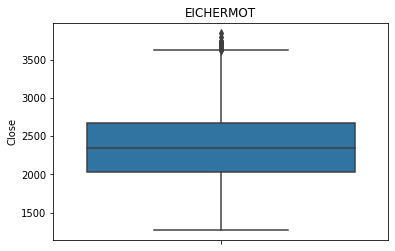

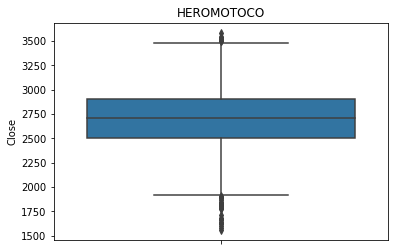

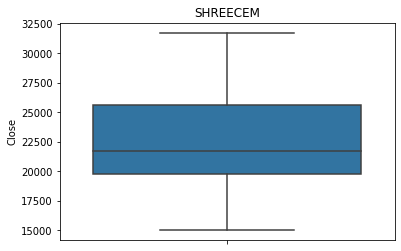

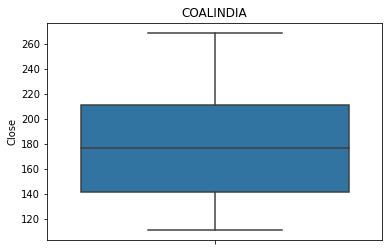

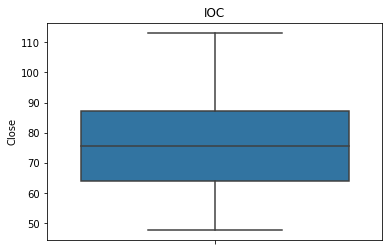

<Figure size 432x288 with 0 Axes>

In [14]:
for i in nifty_50:
    i=i.replace(" ","")
    sns.boxplot(y=df[i]["Close"])
    plt.title(i)
    plt.figure()

In [15]:
for i in nifty_50:
        i=i.replace(" ","")
        df[i].index=df[i].pop("Date")
        df[i]=df[i][["Close"]]

### --- Arranging data

In [16]:
import numpy as np

def df_to_new_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = pd.to_datetime(first_date_str)
    last_date  = pd.to_datetime(last_date_str)

    target_date = first_date
  
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
    
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True
    
    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
  
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
  
    ret_df['Target'] = Y

    return ret_df

In [17]:
new_df={}

In [18]:
for i in nifty_50:
    i=i.replace(" ","")
    new_df[i] = df_to_new_df(df[i],'2018-11-12','2022-11-03', n=3)

### --- Train test split

In [19]:
x={}
y={}

In [20]:
for i in nifty_50:
    i=i.replace(" ","")
    x[i]=new_df[i][["Target-3","Target-2","Target-1"]]
    y[i]=new_df[i]["Target"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train={}
x_test={}
y_train={}
y_test={}

In [23]:
for i in nifty_50:
    i=i.replace(" ","")
    x_train[i],x_test[i],y_train[i],y_test[i]=train_test_split(x[i],y[i],test_size=0.3,random_state=42)

### --- Scaling Data

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc={}

In [26]:
for i in nifty_50:
    i=i.replace(" ","")
    sc[i]=StandardScaler()

In [27]:
for i in nifty_50:
    i=i.replace(" ","")
    x_train[i]=sc[i].fit_transform(x_train[i])
    x_test[i]=sc[i].transform(x_test[i])

### --- Training Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr={}

In [30]:
for i in nifty_50:
    i=i.replace(" ","")
    lr[i]=LinearRegression()

In [31]:
for i in nifty_50:
    i=i.replace(" ","")
    lr[i].fit(x_train[i],y_train[i])

In [32]:
y_train_pred={}
y_pred={}

In [33]:
for i in nifty_50:
    i=i.replace(" ","")
    y_train_pred[i]=lr[i].predict(x_train[i])
    y_pred[i]=lr[i].predict(x_test[i])

### --- Evaluating the model

In [34]:
from sklearn.metrics import mean_squared_error,r2_score

In [35]:
MSE_values={}
r2_score_values={}

In [36]:
for i in nifty_50:
    i=i.replace(" ","")
    print(f"MSE of {i} = {mean_squared_error(y_train[i],y_train_pred[i])}")
    print(f"R2_Score of {i} = {r2_score(y_train[i],y_train_pred[i])}")

MSE of RELIANCE = 1114.1629543500537
R2_Score of RELIANCE = 0.9959541577907098
MSE of HDFCBANK = 460.62480376190865
R2_Score of HDFCBANK = 0.9884741571729865
MSE of INFY = 423.9267654739346
R2_Score of INFY = 0.9975926387263394
MSE of HDFC = 1897.6375213333122
R2_Score of HDFC = 0.9821535928698412
MSE of ICICIBANK = 113.86953176789444
R2_Score of ICICIBANK = 0.9962944430650126
MSE of TCS = 1818.4382890536015
R2_Score of TCS = 0.9958387024811509
MSE of KOTAKBANK = 893.3225100900855
R2_Score of KOTAKBANK = 0.9860181561385735
MSE of HINDUNILVR = 952.1812424508754
R2_Score of HINDUNILVR = 0.9882580706187772
MSE of AXISBANK = 182.10662189351004
R2_Score of AXISBANK = 0.9875603917198039
MSE of LT = 587.8380269177021
R2_Score of LT = 0.9940871788788899
MSE of ITC = 15.26807945889065
R2_Score of ITC = 0.9922591849504366
MSE of SBIN = 51.07245654344639
R2_Score of SBIN = 0.9961139316915953
MSE of BAJFINANCE = 11082.36914022318
R2_Score of BAJFINANCE = 0.9965055178258375
MSE of ASIANPAINT = 1581

In [37]:
for i in nifty_50:
    i=i.replace(" ","")
    new_df[i].index=new_df[i].pop("Target Date")

### --- Connecting Google Sheet

In [38]:
import gspread
from oauth2client import service_account

In [39]:
# scope =["https://spreadsheets.google.com/feeds",'https://www.googleapis.com/auth/spreadsheets',"https://www.googleapis.com/auth/drive.file","https://www.googleapis.com/auth/drive"]
# creds =service_account.ServiceAccountCredentials.from_json_keyfile_name(r"E:\Vinayak\Prepleaf\Projects\Machine Learning\nifty50-predictions-4fa85d9bd2af.json", scope)
# client= gspread.authorize(creds)

In [40]:
# File=client.open("P&L Calculator").sheet1

In [41]:
creds = 'nifty-50-367916-fcea95ef35bd.json'
client = gspread.service_account(creds)
client

In [42]:
File = client.open('P&L Predictor').sheet1

In [43]:
def price(d,i):    
    date=d
    if pd.to_datetime(date) not in new_df[i].index:
        recent_date=new_df[i].tail(1).index[0]
        while recent_date < pd.to_datetime(date):
            next_date=recent_date + datetime.timedelta(days=1)
            h = new_df[i].loc[recent_date]
            j = np.array([h["Target-2"],h["Target-3"],h["Target"]]).reshape(1,-1)
            j = sc[i].transform(j)
            k = lr[i].predict(j)
            new_df[i].loc[next_date] = [h["Target-2"],h["Target-1"],h["Target"],k[0]]
            recent_date = next_date
    return new_df[i].loc[pd.to_datetime(date)]["Target"]

## Re-run only below 3 cells aganist update in Google Sheet.

In [69]:
Comapny_name = File.get('D1')[0][0]
Total_Quantity = File.get('D2')[0][0]
Buying_date = File.get('D3')[0][0]
Selling_date = File.get('D4')[0][0]

In [70]:
Pn L= int(Total_Quantity) * (price(Selling_date,Comapny_name) - price(Buying_date,Comapny_name))

In [71]:
File.update_cell(9,4,PnL)

{'spreadsheetId': '1rO92itaU1JI_QH1-rHjyVIvwZjadMRN4V3QmtcSwNI8',
 'updatedRange': 'Sheet1!D9',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

# Nice Work!!!!!!

In [47]:
from flask import Flask